# Taller 3
### Estudiantes:

Hugo Andres Sabogal 202013538


Natalia PLata Angel 202013152
## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad se considera entregada para calificación cuando el *cuaderno* de jupyter notebook con extensión `.ipynb` se sube al espacio correspondiente en el aula de Bloque Neón. Ningún material adicional será revisado.

4. La solución del taller debe ser realizado en las mismas **parejas** con las que realizó el Taller 1. No se aceptaran talleres de individuales. En caso de no tener un equipo asignado, informar al equipo docente.

5. El cuaderno debe poderse correr sin errores al momento de evaluar.

## Criterios de evaluación.
A grandes rasgos, en cada uno de los incisos se evaluará su solución y se espera que sea igual a la estipulada en el enunciado. Adicionalmente, su calificación podrá ser penalizada por los siguientes items:

- Falta de seguimiento de las instrucciones.
- Código no-human readable. 
- Falta de una debida explicación y comentarios al código.

A continuación se listan los puntajes máximos para cada punto:
| **Punto** | **Puntaje Máximo** |
|:---------:|:------------------:|
|    1      |         2.0        |
|     2     |         3.0        |


Este Taller evalúa los tópicos de webscraping y tiene el valor de un 20% en su calificación final.

# 1. Scraping Win Sports
Ingrese a la página web [www.winsports.co](https://www.winsports.co/) y realice un código en Python que haga un webscraping de la tabla de posiciones de la **Liga BetPlay Dimayor 2024-II**. El resultado final debe ser un dataframe

In [32]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [1]:
### Importamos librerias
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import numpy as np
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from lxml import etree
import os

In [2]:
# Establecemos directorio
os.chdir(r"C:\Users\hugos\OneDrive - Universidad de los andes\MECA\Semestre 1\Taller Python\Taller-de-Python-MECA\taller 3") #Ingresar aqui directorio

In [3]:
# Realizamos request en winsports
url_winsports = 'https://www.winsports.co/'
r = requests.get(url_winsports)


# Verificamos que todo esté ok
r.status_code == 200

True

In [4]:
# Converitmos el contenido en (soup) mas amigable para python
soup = BeautifulSoup(r.content)

In [5]:
#Hallamos todos los links
links = soup.find_all("a")
[link.get("href") for link in links][4]

'/posiciones/liga-betplay-dimayor-2024-ii'

In [6]:
## Hallamos un link con la tabla completa
url2 = url_winsports + [link.get("href") for link in links][4]

In [7]:
#Abrimos edge con selenium en winsports/posiciones/liga-betplay-dimayor-2024-ii
driver = webdriver.Edge()
driver.get(url2)

In [8]:
# Damos click en elemento (cookies)
elemento1 = WebDriverWait(driver, 10000).until(
    EC.visibility_of_element_located((By.XPATH, '//*[@id="popup-buttons"]/button'))
)
elemento1.click()

In [9]:
# Damos clicks en botones para que aparezca la tabla
time.sleep(15)
## espere a que el elemnto sea visible
elemento = WebDriverWait(driver, 100).until(
    EC.visibility_of_element_located((By.XPATH, '//*[@id="content-phases"]/div[1]'))
)

# Espera hasta que el elemento sea clickeable
elemento = WebDriverWait(driver, 100).until(
    EC.element_to_be_clickable((By.XPATH, '//*[@id="content-phases"]/div[1]'))
)

# Haz clic en el elemento
elemento.click()

In [10]:
# Hallamos objetos que nos interesan (contenido de la tabla)
nombres_column = driver.find_elements(By.XPATH, '//div[contains(@class, "tw-border-b tw-border-light-gray")]')
equipos = driver.find_elements(By.XPATH, '//div[contains(@class, "tw-truncate")]')
posiciones = driver.find_elements(By.XPATH, '//div[contains(@class, "tw-w-[4ch]")]')
contenido_tabla = driver.find_elements(By.CLASS_NAME, 'tw-flex-1')

In [11]:
# Convertimos a los objetos en listas de strings
nombres_column = [nombres_column.text for nombres_column  in nombres_column]
equipos = [equipo.text for equipo in equipos]
contenido_tabla = [contenido_tabla.text for contenido_tabla in contenido_tabla]
posiciones = [posiciones.text for posiciones in posiciones]

In [12]:
## Observamos los objetos para verificar que este bien
print(nombres_column)
print(equipos )
print(contenido_tabla)
print(posiciones)

['Equipos\nJugados\nVictorias\nDerrotas\nEmpates\nDiferencia de goles\nPuntos', '', '']
['Independiente Santa Fe', 'América de Cali', 'Millonarios', 'Deportes Tolima', 'Atlético Nacional', 'Junior', 'Once Caldas', 'Deportivo Pasto', 'Independiente Medellín', 'Atlético Bucaramanga', 'Fortaleza CEIF', 'Deportivo Pereira', 'La Equidad', 'Águilas Doradas', 'Patriotas Boyacá', 'Alianza', 'Deportivo Cali', 'Jaguares de Córdoba', 'Boyacá Chicó', 'Envigado']
['Jugados', 'Victorias', 'Derrotas', 'Empates', 'Diferencia de goles', 'Puntos', '19', '10', '2', '7', '14', '37', '19', '11', '4', '4', '11', '37', '19', '10', '4', '5', '14', '35', '19', '10', '5', '4', '13', '34', '19', '9', '5', '5', '7', '32', '19', '8', '4', '7', '10', '31', '19', '9', '6', '4', '2', '31', '19', '9', '7', '3', '7', '30', '19', '7', '4', '8', '8', '29', '19', '8', '7', '4', '4', '28', '19', '7', '6', '6', '3', '27', '19', '7', '6', '6', '1', '27', '19', '5', '7', '7', '-6', '22', '19', '5', '8', '6', '-9', '21', '19',

In [13]:
# Arreglamos nombres_colum (es una lista de tres elementos) se convierte a nombres_columnas en una lista con los nombres de las columnas
nombres_column = [i for sublist in nombres_column if sublist for i in sublist.split('\n')]


## Arreglamos contenido tablas (eliminamos strings vacios)
contenido_tabla = list(filter(lambda x: x != "", contenido_tabla))

In [14]:
### Convertimos contenido tablas en un array de 6 columnas
mat_tabla = np.array(contenido_tabla).reshape(-1, 6)

#Eliminamos la primera fila (coincide con column_names)
mat_tabla = mat_tabla[1:]


In [15]:
#Juntamos posicion y nombre del equipo en una sola variable (tal y como esta en la pagina web)
equipo_pos = np.char.add(np.char.add(posiciones,' '), equipos)

In [16]:
#Juntamos todo en un datafame
df_ligacol = pd.DataFrame(mat_tabla, columns=nombres_column[1:])
df_ligacol.insert(0, nombres_column[0], equipo_pos)

In [17]:
#Observamos datframe
df_ligacol

,Equipos,Jugados,Victorias,Derrotas,Empates,Diferencia de goles,Puntos
0,1 Independiente Santa Fe,19,10,2,7,14,37
1,2 América de Cali,19,11,4,4,11,37
2,3 Millonarios,19,10,4,5,14,35
3,4 Deportes Tolima,19,10,5,4,13,34
4,5 Atlético Nacional,19,9,5,5,7,32
5,6 Junior,19,8,4,7,10,31
6,7 Once Caldas,19,9,6,4,2,31
7,8 Deportivo Pasto,19,9,7,3,7,30
8,9 Independiente Medellín,19,7,4,8,8,29
9,10 Atlético Bucaramanga,19,8,7,4,4,28


# 2. Scraping Metro Cuadrado
Ingrese a la página web de Metro Cuadrado y filtre su busqueda para quedarse solo con los apartamentos en arriendo en Chapinero, Bogotá ([este link](https://www.metrocuadrado.com/arriendo/bogota/chapinero/?search=form)). 

### 2.1. Encuentre su universo de trabajo.
Cree un webscraping que extraiga todos los hipervínculos de los apartamentos en arriendo en Bogotá (un poco más de 500 inmuebles). Luego consolide toda esta información en una lista.

Para realizar esto puede tomar dos caminos:
- Camino A. Entrar al menu de `Inspect` > `Network` y buscar el request específico que trae la información a la página. Para que este funcione adecuadamente, tendrá que reconstruir el `Request Headers`. 
- Camino B. Utilizar Selenium para replicar el comportamiento de un humano que navega la página web. Este método es más intuitivo de programar pero será menos eficiente y susceptible a errores de red.

Para cualquiera de los dos caminos, note que tendrá que navegar por varios requests o varios clicks para poder recolectar todos los inmuebles. En caso de que esto se le dificulte, trate de realizar por lo menos un subconjunto de la tarea completa primero. 

In [18]:
#Importamos librerias
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import numpy as np
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import json

In [19]:
#Definimos la url de metro cuadrado
metro_cuadrado = "https://www.metrocuadrado.com/apartamento/arriendo/bogota/chapinero"

In [20]:
# Abrimos metro cuadrado con Chrome gracias a selenium
driver = webdriver.Chrome()
driver.get(metro_cuadrado)

In [21]:
barra_texto = driver.find_element(By.XPATH, '//*[@id="formSearch"]/div/div[1]/div/div[3]/div/div/input')
barra_texto.send_keys('Chapinero ')

boton_chapinero = driver.find_element(By.XPATH, '//*[@id="react-autowhatever-location-section-1-item-0"]/p')
boton_chapinero.click()

boton_buscar = driver.find_element(By.XPATH, '//*[@id="btnSearch"]')
boton_buscar.click()

In [22]:
#Obtenemos los links de la primera pagina
links = driver.find_elements(By.XPATH, '//a[contains(@class, "sc-bdVaJa ebNrSm")]')  # Asegúrate de apuntar a los elementos <a>
href = [link.get_attribute("href") for link in links]  # Extrae los atributos href
href

[None,
 None,
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-sucre-1-habitaciones-1-banos/4278-M5345743',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-sucre-1-habitaciones-1-banos/4278-M5345743',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-sucre-1-habitaciones-1-banos/4278-M5345709',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-sucre-1-habitaciones-1-banos/4278-M5345709',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-emaus-2-habitaciones-3-banos-2-garajes/5175-M5325846',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-emaus-2-habitaciones-3-banos-2-garajes/5175-M5325846',
 None,
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-na-3-habitaciones-4-banos-3-garajes/11079-M5229264',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-na-3-habitaciones-4-banos-3-garajes/11079-M5229264',
 None,
 'https://www.metrocuadr

#### Indeficamos que los links estan repetidos y aprecen elementos None. Entonces sea creara un loop que los elimine e itere de pagina

In [23]:
# Crear una lista vacía para guardar los hrefs
lista_links = []

In [24]:
#Itera sobre las paginas (hay 20 paginas)
for i in range(12):
    # Encuentra links
    links = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.XPATH, '//li[contains(@class, "sc-gPEVay")]//a'))
    )
    #obtenemos los hipervincuclos
    href = [link.get_attribute("href") for link in links if link.get_attribute("href") is not None]
    #Filtramos por hipervinculos que contienen "/inmueble"
    urls_filtradas = [url for url in href if '/inmueble' in url]
    # Extendemos la lista
    lista_links.extend(urls_filtradas)  # Extiende en lugar de append para evitar listas anidadas
   
    # Encuentra y haz clic en el botón "Next"
    try:
        # Encuentra el boton de "pagina siguiente"
        next_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//a[@aria-label='Next']"))
        )

        #Scrollea hasta abajo de la pagina
        driver.execute_script("arguments[0].scrollIntoView();", next_button)
        #Le click al boton
        next_button.click()

        #Exception para cuando no hay boton (ultima pagina)
    except Exception as e:
        print(f"No se pudo hacer clic en el botón Next: {e}")
        break

#Nos quedamos con links que no son repetidos y los convertimos en lista
lista_links = pd.unique(lista_links).tolist()

C:\Users\hugos\AppData\Local\Temp\ipykernel_24188\1599679338.py:32: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  lista_links = pd.unique(lista_links).tolist()


In [25]:
#Verificamos longitud de la lista
len(lista_links)

600

In [26]:
#observamos lista  de links
lista_links

['https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-emaus-2-habitaciones-3-banos-2-garajes/5175-M5325846',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-na-3-habitaciones-4-banos-3-garajes/11079-M5229264',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-bosque-calderon-2-habitaciones-4-banos-2-garajes/717-M5014931',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-pardo-rubio-noroccidental-2-habitaciones-2-banos-2-garajes/5175-M5325790',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-chapinero-sur-occidental-1-habitaciones-1-banos-1-garajes/11139-M5171534',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-bellavista-3-habitaciones-4-banos-3-garajes/920-M5310918',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-pardo-rubio-1-habitaciones-2-banos-1-garajes/11013-M5390026',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-quesa

In [27]:
#Limpiar links obtenidos
urls_filtradas = list(set(filter(lambda x: x is not None, lista_links))) #Notamos que hay objetos de clase None en la lista, entonces los eliminamos
urls_filtradas = [url for url in urls_filtradas if '/inmueble' in url] #Hay otros links que no son inmuebles 
urls_filtradas[:-20] #Observamos los ultimos 20

['https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-cjr-sierras-del-este-3-habitaciones-3-banos-2-garajes/MC5256332',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-emaus-2-habitaciones-2-banos-2-garajes/11256-M5108519',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-na-3-habitaciones-4-banos/2214-M5306361',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-maria-cristina-1-habitaciones-2-banos-1-garajes/368-M5195028',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-palermo-1-habitaciones-1-banos/MC5378670',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-chapinero-central-1-habitaciones-1-banos/13957-M5371411',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-chapinero-sur-occidental-1-habitaciones-1-banos/258-M5293800',
 'https://www.metrocuadrado.com/inmueble/arriendo-apartamento-bogota-ingemar-2-habitaciones-2-banos-1-garajes/MC5266863',
 'ht

### 2.2. Descargue la información.
Haga otro webscraping que vaya iterando sobre cada uno de los elementos de la lista de inmuebles y extraiga la información relevante del inmueble. Construya un dataframe con sus resultados.

In [28]:
# Identificamos variables que nos interesan dentro del json
lista_interes = ['area', 'areac', 'areaUp', 'areaFrom', 'areaPrivada', 'bathrooms', 'builtTime', 'city', 'comment',
               'commonNeighborhood', 'companyLink', 'coordinates', 'contactPhone', 'descriptionSeo', 'garages', 
               'neighborhood', 'propertyId', 'rentPrice', 'rentTotalPrice', 'rooms', 'stratum', 'title', 
               'whatsapp', 'propertyState', 'featured', 'link']

#Creamos lista para almacerna
lista_datos= []

# Un loop que recorra la lista de links
for i in lista_links:
    
    # Request, sopa y obtención de elemetos
    r = requests.get(i)
    soup = BeautifulSoup(r.content)
    elementos = soup.find_all(attrs={"id":"__NEXT_DATA__"})
    
    # Cargamos el contenido como json
    contenido = elementos[0].contents[0]
    datos_apto = json.loads(contenido)
    
    #Identificamos la ubicación de los datos en el json
    dic_impotantes=datos_apto['props']['initialProps']['pageProps']['realEstate']
    
    #Filtramos el diccionarios para que queden los las variables de interes
    dic_filtrado = dict(filter(lambda item: item[0] in lista_interes, dic_impotantes.items()))
    
    # Añadimos el deccionario a una lista
    lista_datos.append(dic_filtrado)
    
# Convertimos la lista de diccionarios en dataframe
df_aptos = pd.DataFrame(lista_datos)
#Observamos columnas
df_aptos.columns
# Guardamos el objeto porque se demora mucho en correr este chunk de codigo
df_aptos.to_pickle('datos_aptos.pickle')

In [29]:
#Observamos el dataframe
df_aptos

,propertyId,rentPrice,rentTotalPrice,area,areac,areaPrivada,rooms,bathrooms,garages,city,...,propertyState,coordinates,title,link,featured,builtTime,stratum,areaFrom,areaUp,descriptionSeo
0,5175-M5325846,6500000,6500000,114.00,114.00,None,2,3,2,"{'id': '1', 'nombre': 'Bogotá D.C.'}",...,Usado,"{'lon': -74.0552, 'lat': 4.64908}","Apartamento en Arriendo, Granada Chapinero, Bo...",https://www.metrocuadrado.com/inmueble/arriend...,"[{'title': 'Interiores', 'items': ['Con chimen...",Entre 5 y 10 años,4,None,None,"Apartamento en arriendo en Granada chapinero, ..."
1,11079-M5229264,10000000,10000000,240.00,240.00,None,3,4,3,"{'id': '1', 'nombre': 'Bogotá D.C.'}",...,Usado,"{'lon': 0, 'lat': 0}","Apartamento en Arriendo, Chapinero Alto, Bogot...",https://www.metrocuadrado.com/inmueble/arriend...,"[{'title': 'Interiores', 'items': ['Baño Auxil...",Entre 5 y 10 años,6,None,None,"Apartamento en arriendo en Chapinero alto, Bog..."
2,717-M5014931,9900000,9900000,160.00,160.00,None,2,4,2,"{'id': '1', 'nombre': 'Bogotá D.C.'}",...,Usado,"{'lon': -74.05987, 'lat': 4.6385975}","Apartamento en Arriendo, CHAPINERO ALTO EL C...",https://www.metrocuadrado.com/inmueble/arriend...,"[{'title': 'Interiores', 'items': ['Con chimen...",Entre 10 y 20 años,4,None,None,Apartamento en arriendo en Chapinero alto el...
3,5175-M5325790,3500000,3500000,93.00,93.00,None,2,2,2,"{'id': '1', 'nombre': 'Bogotá D.C.'}",...,Usado,"{'lon': -74.05941, 'lat': 4.63481}","Apartamento en Arriendo, El Castillo Chapinero...",https://www.metrocuadrado.com/inmueble/arriend...,"[{'title': 'Interiores', 'items': ['Con chimen...",Entre 10 y 20 años,5,None,None,Apartamento en arriendo en El castillo chapine...
4,11139-M5171534,1341100,1341100,27.94,27.94,None,1,1,1,"{'id': '1', 'nombre': 'Bogotá D.C.'}",...,Usado,"{'lon': -74.067856, 'lat': 4.645923}","Apartamento en Arriendo, San Luis, Bogotá D.C.",https://www.metrocuadrado.com/inmueble/arriend...,[],Más de 20 años,4,None,None,"Apartamento en arriendo en San luis, Bogotá D...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,MC5311599,2600000,2600000,90.00,72.00,None,3,2,1,"{'id': '1', 'nombre': 'Bogotá D.C.'}",...,Usado,"{'lon': -74.05918, 'lat': 4.648789}","Apartamento en Arriendo, ALTOS DE CHAPINERO ...",https://www.metrocuadrado.com/inmueble/arriend...,"[{'title': 'Interiores', 'items': ['Baño Auxil...",Más de 20 años,4,None,None,Apartamento en arriendo en Altos de chapinero ...
596,MC5323645,3800000,3800000,52.00,52.00,None,1,2,1,"{'id': '1', 'nombre': 'Bogotá D.C.'}",...,Usado,"{'lon': -74.05932, 'lat': 4.641539}","Apartamento en Arriendo, CHAPINERO ALTO Chic...",https://www.metrocuadrado.com/inmueble/arriend...,"[{'title': 'Interiores', 'items': ['Baño Auxil...",Entre 5 y 10 años,4,None,None,Apartamento en arriendo en Chapinero alto ch...
597,MC5304504,3000000,3000000,75.00,78.00,None,3,2,2,"{'id': '1', 'nombre': 'Bogotá D.C.'}",...,Usado,"{'lon': -74.10214, 'lat': 4.642942}","Apartamento en Arriendo, CIUDAD SALITRE ORIENT...",https://www.metrocuadrado.com/inmueble/arriend...,"[{'title': 'Interiores', 'items': ['Citófonos'...",Más de 20 años,4,None,None,Apartamento en arriendo en Ciudad salitre orie...
598,MC5355868,1550000,1550000,15.60,15.60,None,1,1,0,"{'id': '1', 'nombre': 'Bogotá D.C.'}",...,Usado,"{'lon': -74.06498, 'lat': 4.636049}","Apartamento en Arriendo, MARLY CHAPINERO Cha...",https://www.metrocuadrado.com/inmueble/arriend...,"[{'title': 'Interiores', 'items': ['Citófonos'...",Entre 0 y 5 años,4,None,None,Apartamento en arriendo en Marly chapinero c...


2.3. Grafique los resultados.
- Cree un histograma que permita visualizar la distribución de los precios por metro cuadrado. 
- Cree una gráfica que le permita comparar las distribuciones de los precios por estrato.
- Cree una gráfica que le permita comparar las distribuciones de los precios por antigüedad del edifico.

### Histograma: Distribución de precios por metro cuadrado

In [30]:
#Importamos matplotlib
import matplotlib.pyplot as plt
# Leemos archivo
df_aptos=pd.read_pickle('datos_aptos.pickle')

In [31]:
# Creamos precio por mt2
df_aptos['precio_por_mt2'] = df_aptos['rentPrice']/df_aptos['area']

#Eliminamos outliers
df_aptos=df_aptos[df_aptos['precio_por_mt2']<2000000]

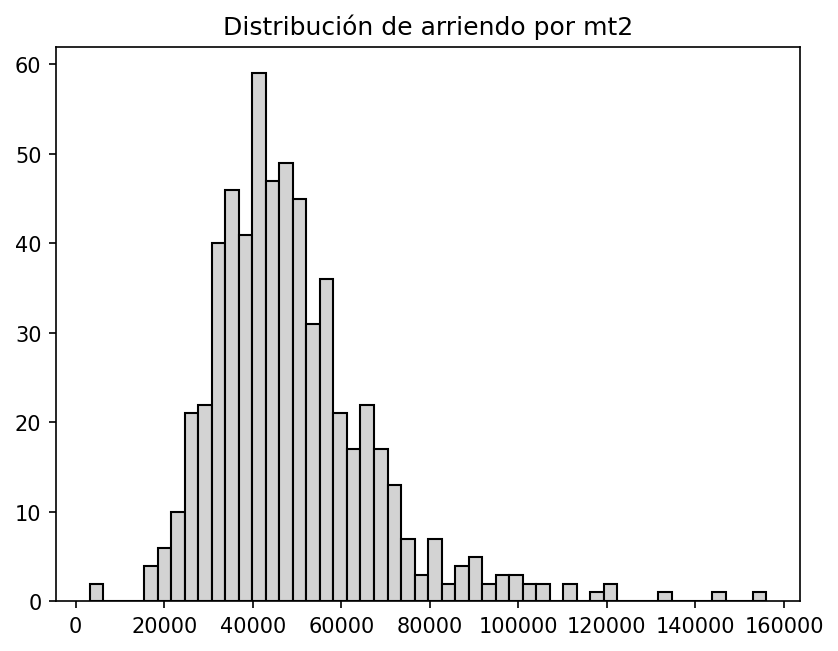

In [32]:
#Graficamos histograma
fig, ax = plt.subplots(dpi=150)
#Titulo
ax.set_title('Distribución de arriendo por mt2')
#Settings del histograma
ax.hist(df_aptos['precio_por_mt2'], bins=50, edgecolor = 'black', color='lightgray')
#Imprime el grafico
plt.show()

In [33]:
# Tabla de frecuencia de estrato (vemos que no hay estrato 1)
df_aptos['stratum'].value_counts()

stratum
4    327
3    112
6     81
5     71
2      6
Name: count, dtype: int64

### Grafico de barras: Distribución de precios por estrato

In [34]:
# Convertimos estrato en tipo de dato entero
df_aptos['stratum'] = df_aptos['stratum'].astype(int)


In [35]:
# Calculamos el precio promedio por estraro
estratos = df_aptos.groupby('stratum')['rentTotalPrice'].mean()
estratos

stratum
2    1.763667e+06
3    1.919744e+06
4    2.916417e+06
5    4.946845e+06
6    1.027415e+07
Name: rentTotalPrice, dtype: float64

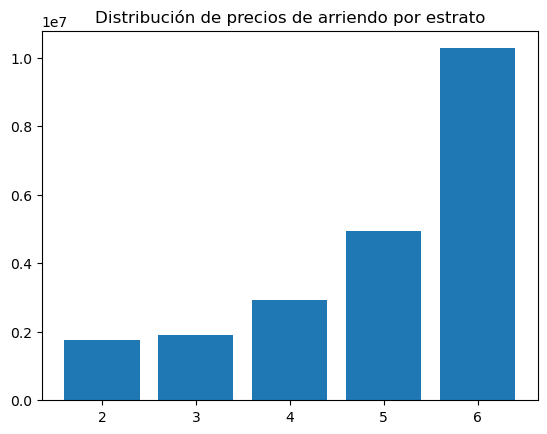

In [36]:
#Graficamos las barras
fig, ax = plt.subplots()
#Titulo
ax.set_title('Distribución de precios de arriendo por estrato')
#settings del grafico
ax.bar(estratos.index, estratos.values)
#Imprime el grafico
plt.show()

### Grafico de barras: Distribución de precios por antiguedad

In [37]:
#Observamos tabla de frecuencia de builTime
df_aptos['builtTime'].value_counts()

builtTime
Más de 20 años        185
Entre 0 y 5 años      157
Entre 10 y 20 años    128
Entre 5 y 10 años      99
Remodelado             28
Name: count, dtype: int64

In [38]:
#creamos el precio promedio por antiguedad
timebuild = df_aptos.groupby('builtTime')['rentTotalPrice'].mean()
timebuild

builtTime
Entre 0 y 5 años      2.785246e+06
Entre 10 y 20 años    4.675013e+06
Entre 5 y 10 años     4.214846e+06
Más de 20 años        4.282804e+06
Remodelado            4.193571e+06
Name: rentTotalPrice, dtype: float64

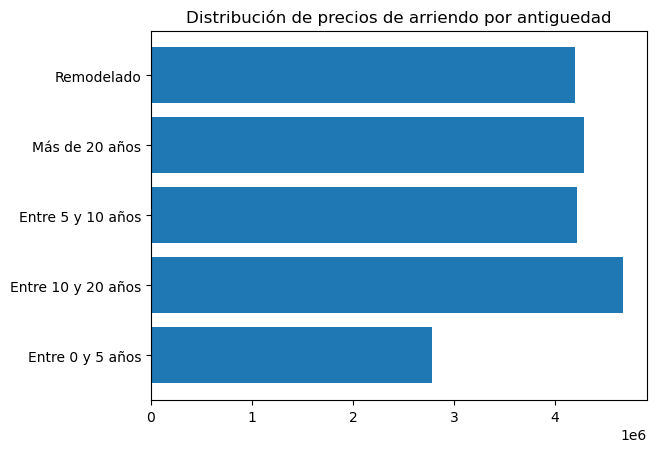

In [39]:
#Graficamos las barras
fig, ax = plt.subplots()
#Titulo
ax.set_title('Distribución de precios de arriendo por antiguedad')
#Settings del grafico
ax.barh(timebuild.index, timebuild.values)
#Imprime el grafico
plt.show()

3. Bono
Encuentre la latitud y longitud de cada uno de los apartamentos de su muestra utilizando webscraping. Grafique los resultados en un mapa de Bogotá.

Describa (no tiene que hacerlo) cómo podría construir una medida de valor de metro cuadrado por cuadra en Chapinero.

 #### La latitud y lonigtud de los apartamentos fue encontrada en el punto 2.2. A continuación se extraera la información del dataframe `df_aptos` para graficar.



Por otro lado, para calcular el precio del mt2 por cuadra, se identificarían las cuadras geográficamente como elementos de líneas, utilizando fuentes de datos externas como OpenStreetMap. Luego, se identificarían los apartamentos ubicados en cada cuadra. Con estos datos, se podría sumar el precio de todos los apartamentos pertenecientes a la cuadra, así como su área. A partir de esta información, se dividiría la suma del precio total de los apartamentos en la cuadra entre el área total de los apartamentos en la cuadra, obteniendo una medida del valor promedio por metro cuadrado en cada cuadra.

In [40]:
# Convertimos la variable cordinates en una lista
ubicaciones=df_aptos['coordinates'].values.tolist()
ubicaciones =[list(d.values()) for d in ubicaciones if d is not None]


In [41]:
#Instalamos folium para mapa interatico con openstreetmap y leaflet
#pip install folium (correr la linea anteior si folium no esta instalado)


La siguiente sección se encuentra inspirada en la siguente pagina web
https://medium.com/@chibuzordev/creating-interactive-maps-the-easy-way-with-python-folium-and-leaflet-js-f5bcc24862f

In [42]:
import folium


# Calculamos cordenada promedio de chapinero
lat_chapi = 4.647066223447253
long_chapi = -74.05894435233326

# Crear un mapa centrado en el punto promedio 
mapa = folium.Map(location=[lat_chapi, long_chapi], zoom_start=14)

# Agregamos marcadores en la ubicación de los apartamentos
for coord in ubicaciones:
    folium.Marker(location=[coord[1], coord[0]]).add_to(mapa)

# agragramos un marcador invisible para el promedio (no representa nigun apartamento)
folium.Marker(
    location=[lat_chapi, long_chapi], 
    icon=folium.Icon(color='transparent')  # Icono transparente
).add_to(mapa)


C:\Users\hugos\AppData\Local\Temp\ipykernel_24188\3759887036.py:18: UserWarning: color argument of Icon should be one of: {'lightgreen', 'green', 'darkgreen', 'pink', 'black', 'darkred', 'red', 'lightgray', 'purple', 'blue', 'orange', 'cadetblue', 'darkpurple', 'darkblue', 'lightblue', 'white', 'gray', 'lightred', 'beige'}.
  icon=folium.Icon(color='transparent')  # Icono transparente


In [44]:
#Importamos libreia
from IPython.display import display

# Imprime el mapa
display(mapa)